In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PowerTransformer

In [3]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.duplicated().sum()

25

In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.shape

(1005, 9)

In [10]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [11]:
X=df.drop(columns=["Strength"])
y=df.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

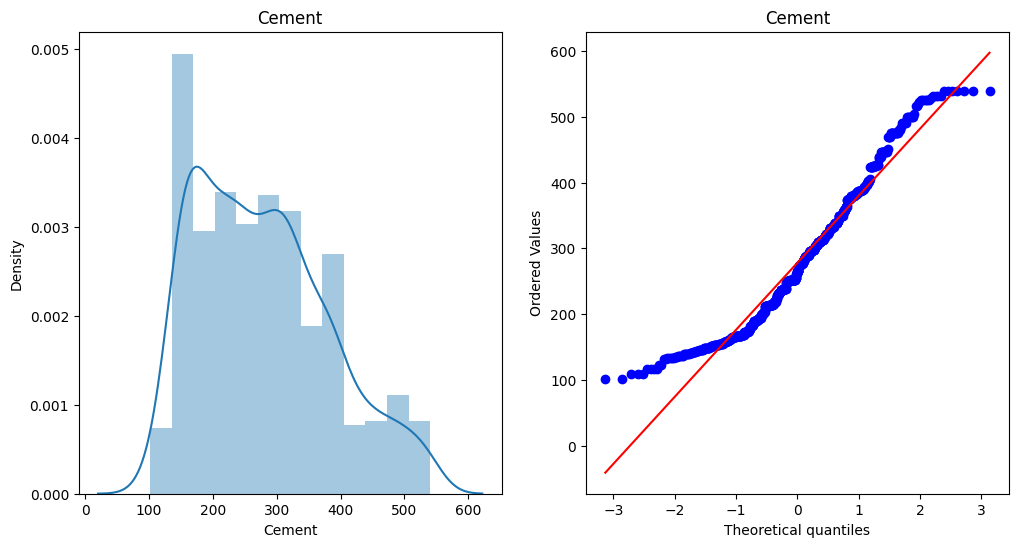

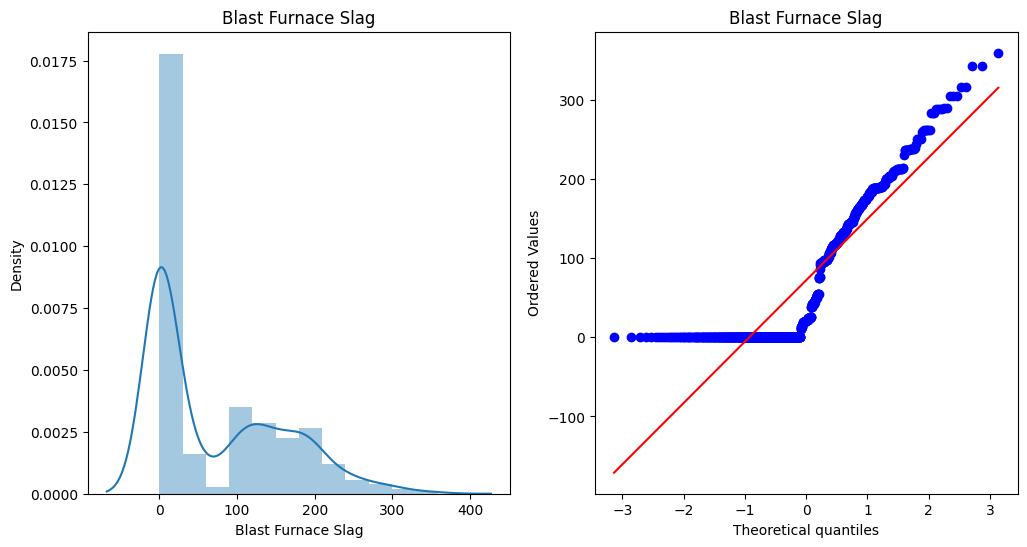

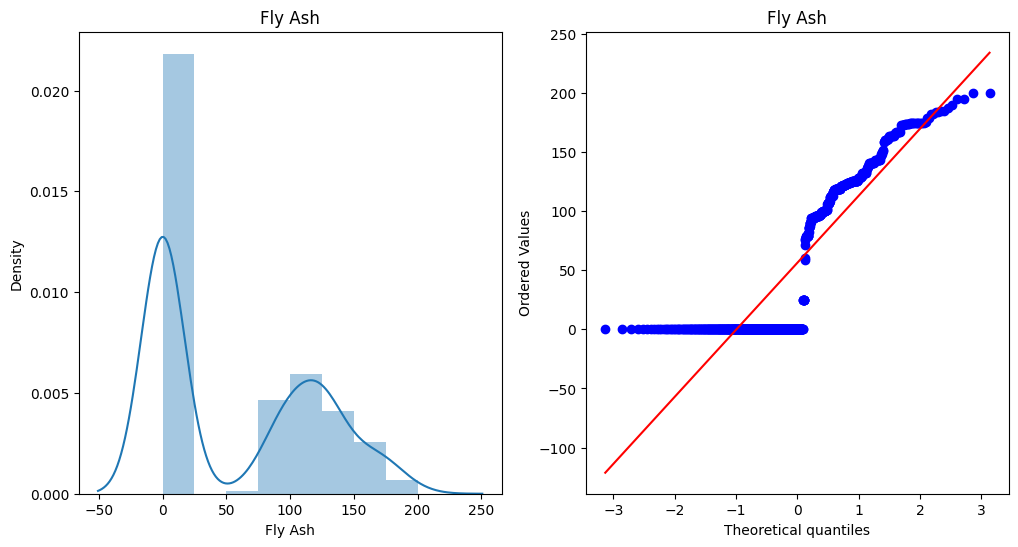

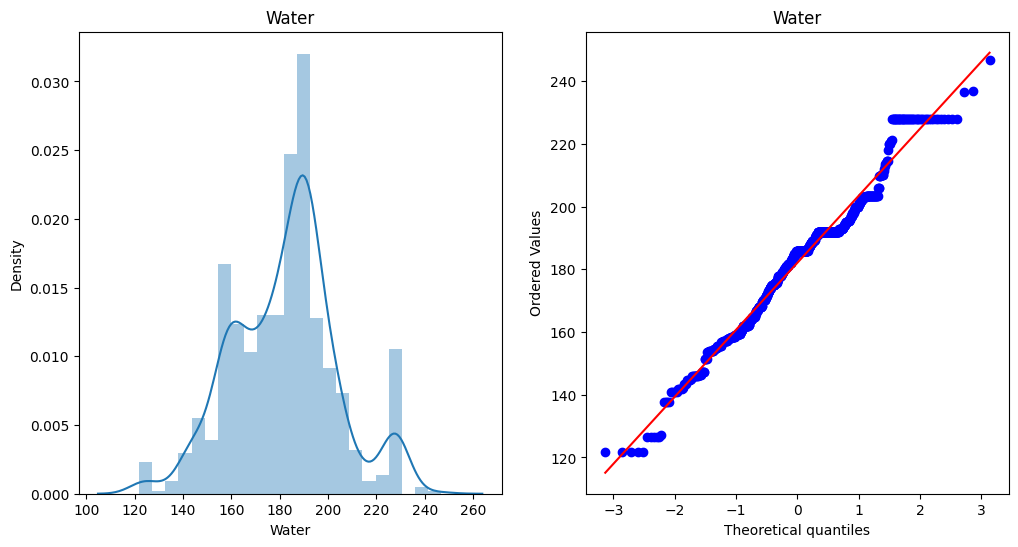

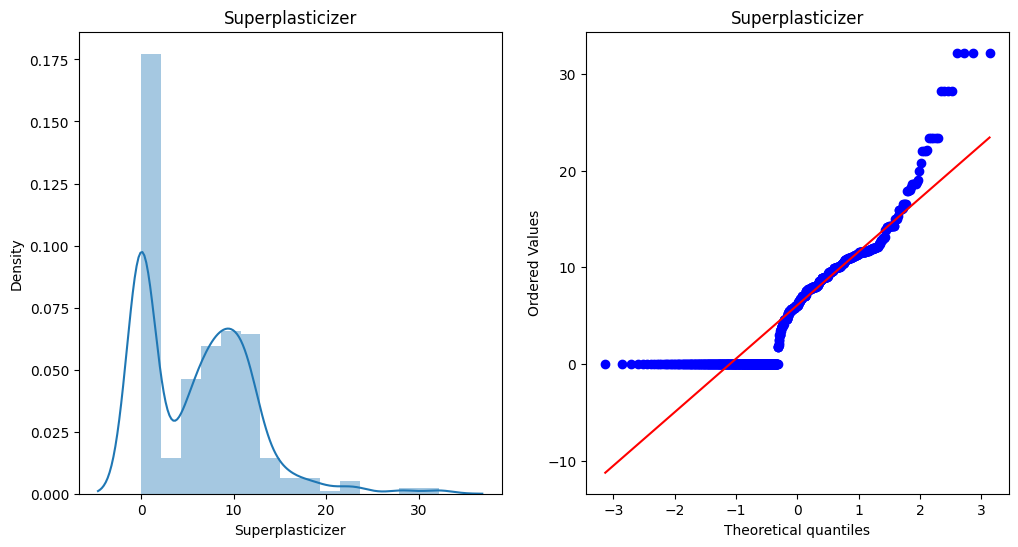

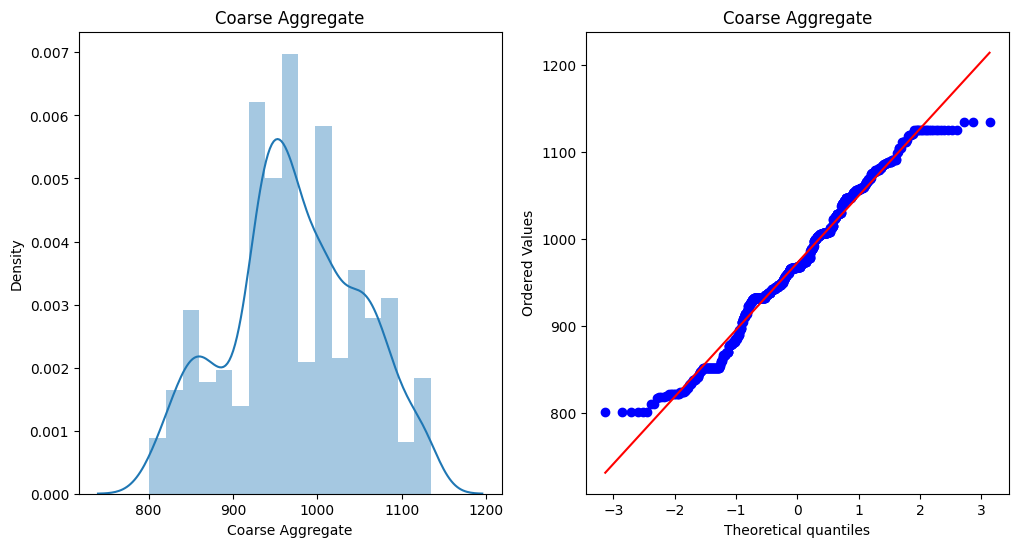

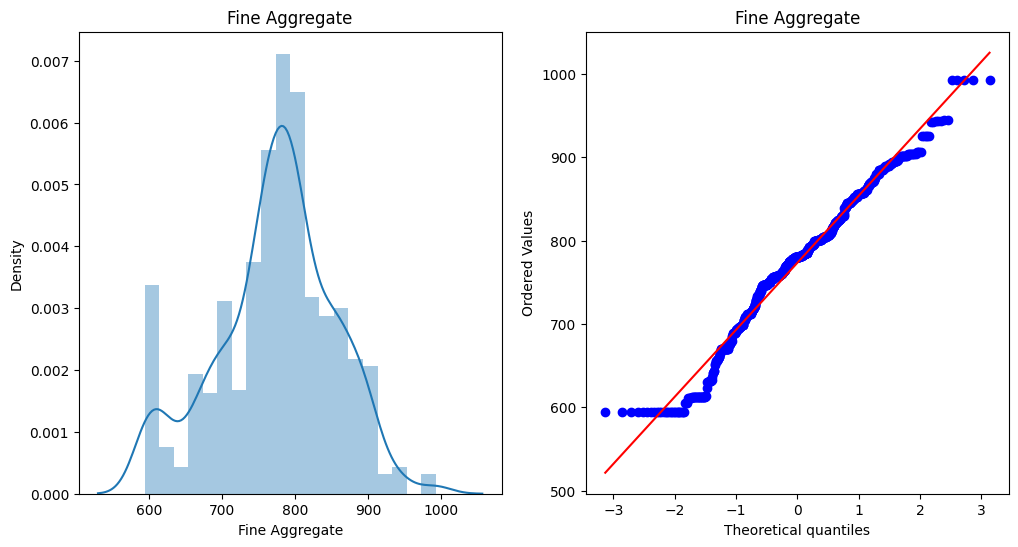

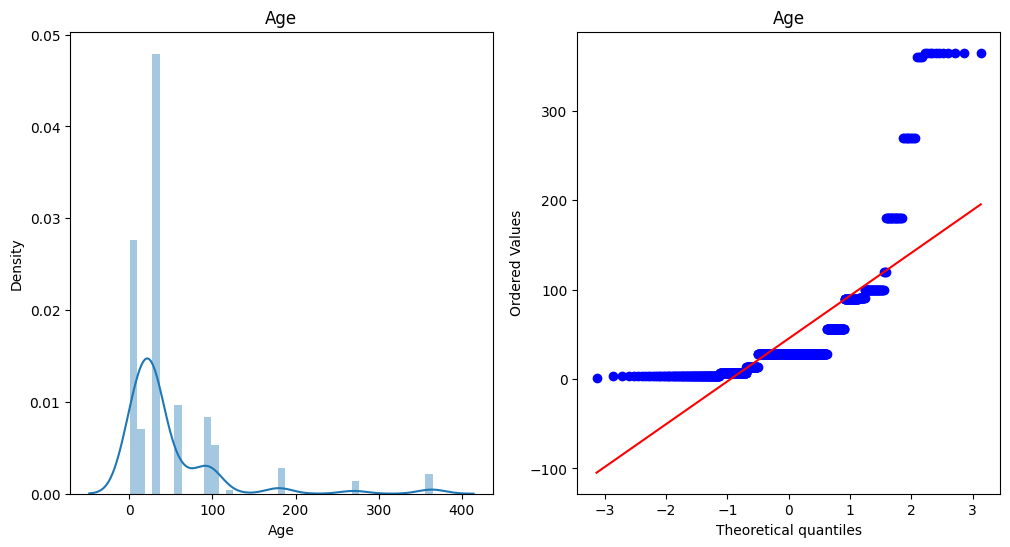

In [13]:
for col in X_train.columns: 
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

In [14]:
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

r2,mae

(0.5801703029028777, 8.895256221464194)

In [15]:
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.47680010562839026

# After PowerTransformer

In [16]:
pt=PowerTransformer(method="box-cox")

X_train_trans=pt.fit_transform(X_train+0.0000001)
X_test_trans=pt.transform(X_test+0.000001)

In [17]:
X_train_lamdas=pd.DataFrame({'Columns':X_train.columns,'box_cox_lambdas':pt.lambdas_})
X_train_lamdas

,Columns,box_cox_lambdas
0,Cement,0.101285
1,Blast Furnace Slag,0.019807
2,Fly Ash,-0.020932
3,Water,0.950247
4,Superplasticizer,0.083333
5,Coarse Aggregate,1.198571
6,Fine Aggregate,1.911749
7,Age,0.051998


In [18]:
X_train_trans

array([[ 1.94536562, -1.07513859, -0.9301488 , ..., -1.5493093 ,
         1.56276169, -1.70851973],
       [ 1.62918231, -1.07513859, -0.9301488 , ..., -0.5317914 ,
        -2.05386493, -1.04499698],
       [ 0.15705113, -1.07513859,  1.0612968 , ...,  0.00886587,
         1.30680031, -1.70851973],
       ...,
       [-1.37490834,  0.96197834,  1.07270004, ..., -1.36094299,
         0.60336126,  0.10568133],
       [-1.18522553,  0.94772289,  1.08464922, ...,  0.42360744,
        -0.37850688,  1.23789026],
       [ 0.24399921,  1.00062704, -0.9301488 , ...,  0.40795802,
         0.33731229, -1.04499698]])

In [19]:
X_train_transformation=pd.DataFrame(X_train_trans,columns=X_train.columns)

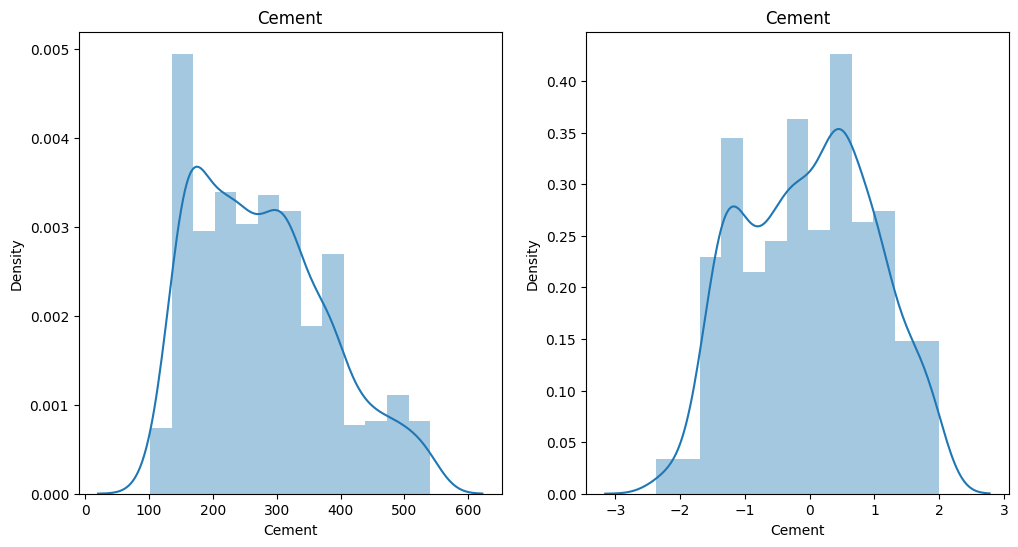

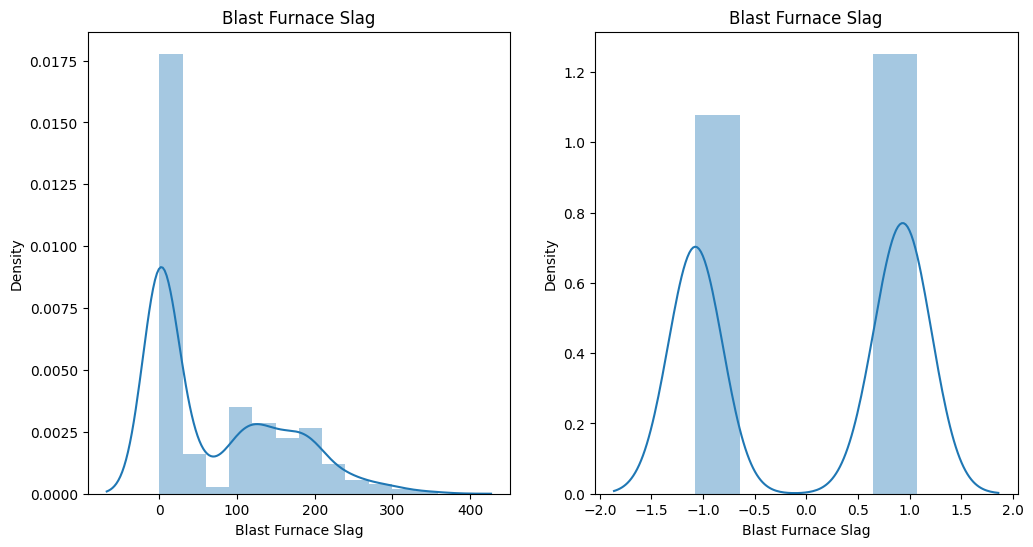

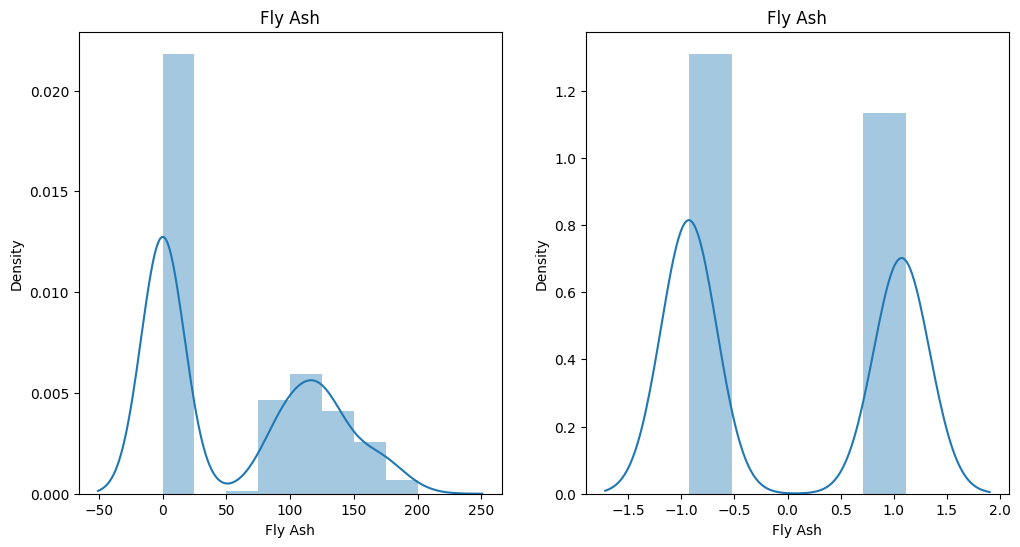

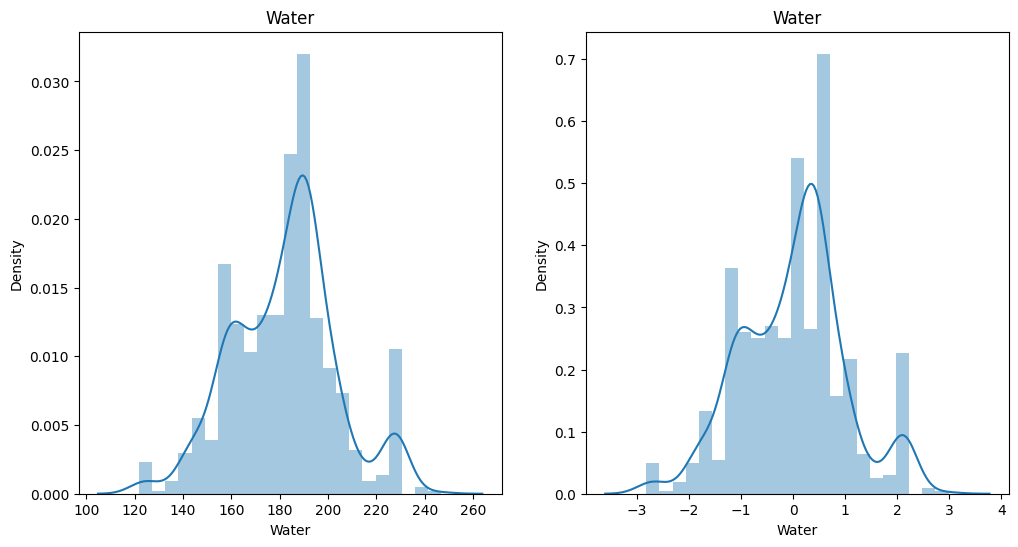

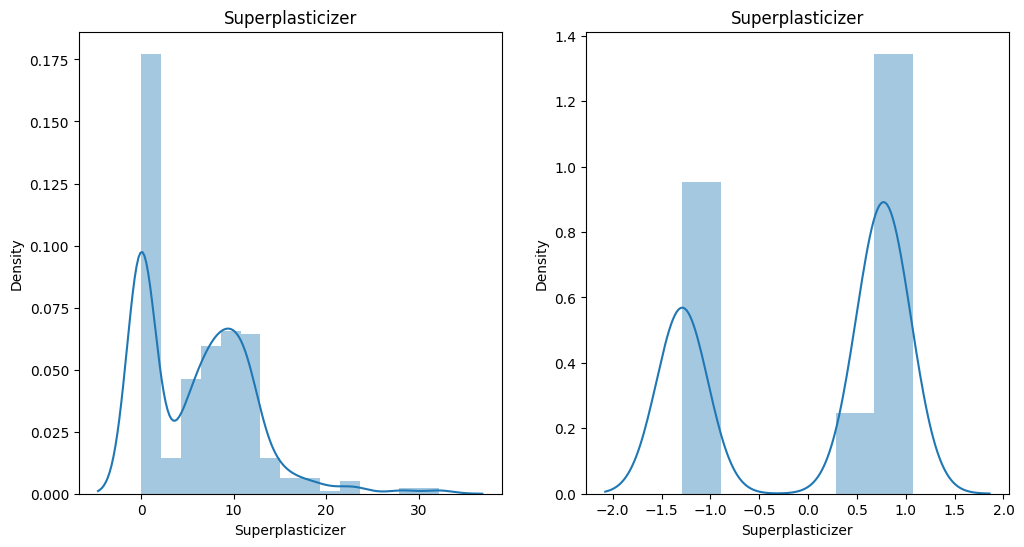

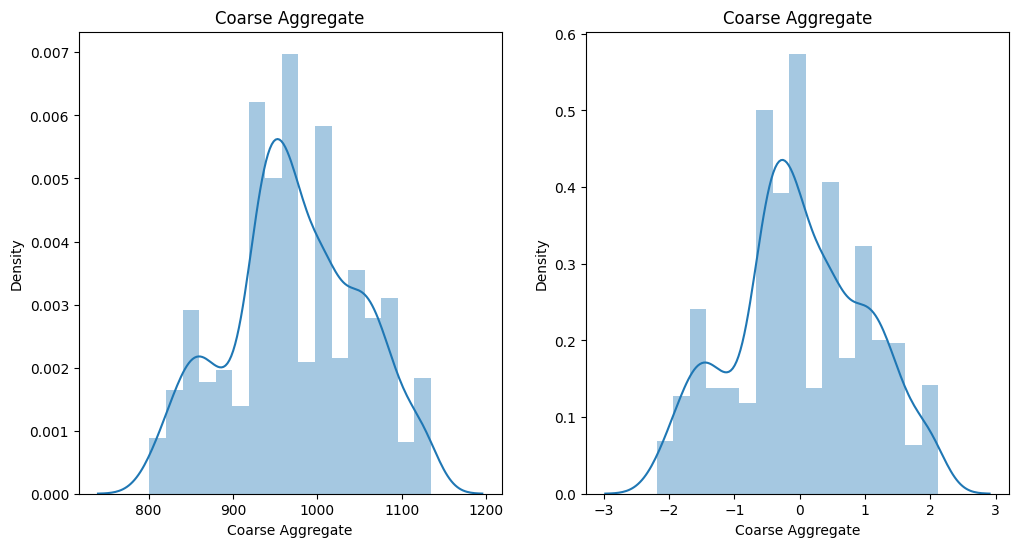

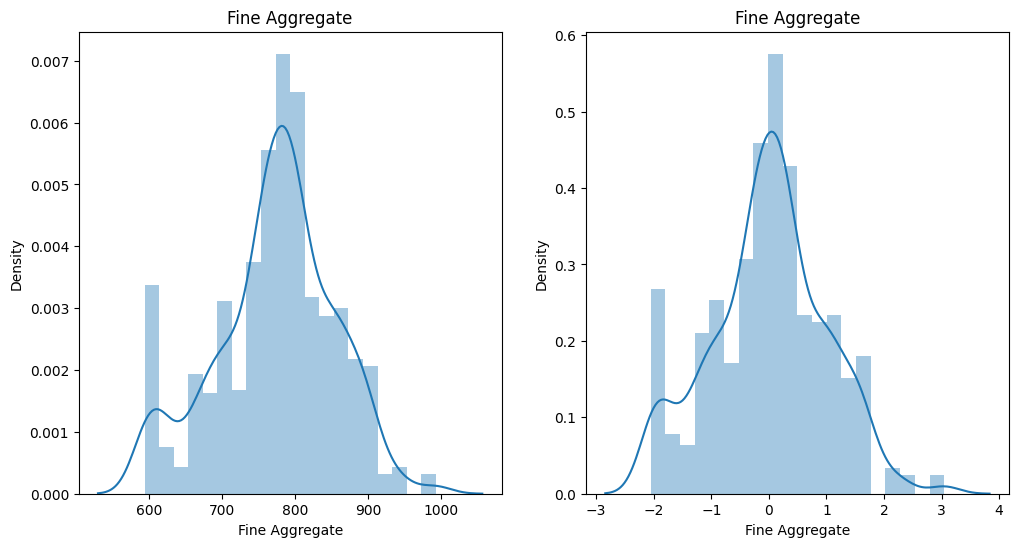

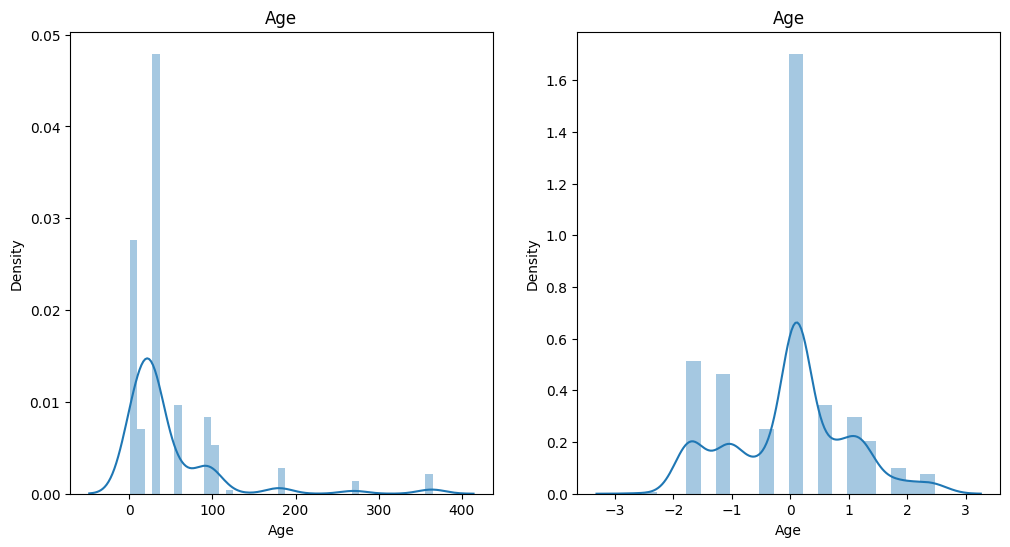

In [20]:


for col in X_train_transformation.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformation[col])
    plt.title(col)

In [21]:
lr_trans=LinearRegression()
lr_trans.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred_trans=lr_trans.predict(X_test_trans)
r2_trans=r2_score(y_test,y_pred_trans)
mae_trans=mean_absolute_error(y_test,y_pred_trans)

r2_trans,mae_trans

(0.7945265969126567, 5.905238251371226)

In [23]:
pt2 = PowerTransformer(method='box-cox')
X_trans = pt2.fit_transform(X+0.0000001)

lr_trans = LinearRegression()
np.mean(cross_val_score(lr_trans,X_trans,y,scoring='r2'))

0.6756775573240261

# Using Yeo-Johnson 

In [24]:
pt1 = PowerTransformer()

X_train_trans2 = pt1.fit_transform(X_train)
X_test_trans2 = pt1.transform(X_test)

lr_yeo = LinearRegression()
lr_yeo.fit(X_train_trans2,y_train)

y_pred_yeo = lr_yeo.predict(X_test_trans2)

print(r2_score(y_test,y_pred_yeo))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.795556056917335


,cols,Yeo_Johnson_lambdas
0,Cement,0.098283
1,Blast Furnace Slag,0.001796
2,Fly Ash,-0.101005
3,Water,0.949883
4,Superplasticizer,0.242384
5,Coarse Aggregate,1.198868
6,Fine Aggregate,1.912998
7,Age,0.005200


In [25]:
pt1 = PowerTransformer()
X_trans2 = pt1.fit_transform(X+0.0000001)

lr_yeo = LinearRegression()
np.mean(cross_val_score(lr_yeo,X_trans2,y,scoring='r2'))

0.6938787284562195

## Yeo-Johnson is better than Box-Cox